# Make test with different  chunk sizes and different operations

In [10]:
## path for mdules

import sys
sys.path.insert(0,"/home/users/albert6a/lib/python")

In [11]:
## imports

import numpy as np
import dask
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import pandas as pd 
import datetime
import glob as glob
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap
import time
from dask.diagnostics import ProgressBar

%matplotlib inline

In [12]:
## datasets

#NATL60

dir="/home/users/albert6a/Data/NATL60/"
file="NATL60-CJM165_y2012m06d14.1d_gridT.nc"

tfile=dir+file

!ls $tfile


/home/users/albert6a/Data/NATL60/NATL60-CJM165_y2012m06d14.1d_gridT.nc


## Test with only one NATL60 file

In [13]:
dsN = xr.open_dataset(tfile, chunks={'deptht':30 ,'time_counter':1})
latN = dsN.nav_lat
lonN = dsN.nav_lon
depN = dsN.deptht
model_temperature = dsN.votemper
model_salinity = dsN.vosaline
timN = dsN.time_counter

In [19]:
res = lonN.min()
with ProgressBar():
    out = res.compute()

[########################################] | 100% Completed |  2.1s


In [21]:
# model_temperature[0,0,:,:].plot()
# Memory Error

In [14]:
model_temperature_stacked = model_temperature.stack(profile=('x', 'y'))

In [22]:
dsN = xr.open_dataset(tfile, chunks={'x':500,'y':500,'deptht':30 ,'time_counter':1})
latN = dsN.nav_lat
lonN = dsN.nav_lon
depN = dsN.deptht
model_temperature = dsN.votemper
model_salinity = dsN.vosaline
timN = dsN.time_counter

In [23]:
res = lonN.min()
with ProgressBar():
    out = res.compute()

[########################################] | 100% Completed |  1.0s


In [4]:
# model_temperature[0,0,:,:].plot()
# MemoryError

In [4]:
dsN = xr.open_dataset(tfile, chunks={'x':1000,'y':1000,'deptht':30 ,'time_counter':1})
latN = dsN.nav_lat
lonN = dsN.nav_lon
depN = dsN.deptht
model_temperature = dsN.votemper
model_salinity = dsN.vosaline
timN = dsN.time_counter

In [8]:
res = lonN.min()
with ProgressBar():
    out = res.compute()


[########################################] | 100% Completed |  0.2s


In [12]:
#model_temperature[0,0,:,:].plot()
#MemoryError

In [13]:
dsN = xr.open_dataset(tfile, chunks={'x':1500,'y':1500,'deptht':30 ,'time_counter':1})
latN = dsN.nav_lat
lonN = dsN.nav_lon
depN = dsN.deptht
model_temperature = dsN.votemper
model_salinity = dsN.vosaline
timN = dsN.time_counter

In [14]:
res = lonN.min()
with ProgressBar():
    out = res.compute()


[########################################] | 100% Completed |  1.7s


In [5]:
#model_temperature[0,0,:,:].plot()
#=> MemoryError

In [6]:
dsN = xr.open_dataset(tfile, chunks={'x':2000,'y':2000,'deptht':30 ,'time_counter':1})
latN = dsN.nav_lat
lonN = dsN.nav_lon
depN = dsN.deptht
model_temperature = dsN.votemper
model_salinity = dsN.vosaline
timN = dsN.time_counter

In [7]:
res = lonN.min()
with ProgressBar():
    out = res.compute()

[########################################] | 100% Completed |  1.6s


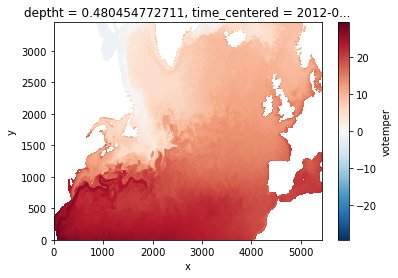

In [8]:
model_temperature[0,0,:,:].plot()

KeyboardInterrupt: 

In [73]:
natl60=xr.open_dataset(tfile)
dep_nat=natl60['deptht']
lat_nat=natl60['nav_lat']
lon_nat=natl60['nav_lon']
temp_nat=natl60['votemper']
sal_nat=natl60['vosaline']
day_nat=natl60['time_counter']


In [74]:
len(dep_nat.values)

300

In [75]:
latval=lat_nat.values
lonval=lon_nat.values
tempval=temp_nat[0,0].values
salval=sal_nat[0,0].values

In [76]:
tempval.shape

(3454, 5422)

In [40]:
def select_region_temp(latr,lonr):
    templat=tempval[np.where(np.abs(latval-latr)<1)]
    lonlat=lonval[np.where(np.abs(latval-latr)<1)]
    tempr=templat[np.where(np.abs(lonlat-lonr)<1)]
    return tempr

In [77]:
temp37N63W=select_region_temp(37,-63)

In [78]:
print 'taille=',temp37N63W.shape
print 'mean=',np.mean(temp37N63W)
print 'min=',np.min(temp37N63W)
print 'max=',np.max(temp37N63W)

taille= (18672,)
mean= 23.3423507441
min= 19.0094432831
max= 25.6885318756


In [79]:
def select_region_sal(latr,lonr):
    sallat=salval[np.where(np.abs(latval-latr)<1)]
    lonlat=lonval[np.where(np.abs(latval-latr)<1)]
    salr=sallat[np.where(np.abs(lonlat-lonr)<1)]
    return salr

In [80]:
sal37N63W=select_region_sal(37,-63)

In [81]:
print 'taille=',sal37N63W.shape
print 'mean=',np.mean(sal37N63W)
print 'min=',np.min(sal37N63W)
print 'max=',np.max(sal37N63W)

taille= (18672,)
mean= 36.4046774711
min= 34.9465904236
max= 36.5759429932


## Loop over depth

In [87]:
def select_profiles_temp(latr,lonr):
    latval=lat_nat.values
    lonval=lon_nat.values
    mean_prof_temp=np.zeros(len(dep_nat.values))
    min_prof_temp=np.zeros(len(dep_nat.values))
    max_prof_temp=np.zeros(len(dep_nat.values))
    for z in np.arange(len(dep_nat.values)):
        tempval=temp_nat[0,z].values
        templat=tempval[np.where(np.abs(latval-latr)<1)]
        lonlat=lonval[np.where(np.abs(latval-latr)<1)]
        tempz=templat[np.where(np.abs(lonlat-lonr)<1)]
        mean_prof_temp[z]=np.mean(tempz)
        min_prof_temp[z]=np.min(tempz)
        max_prof_temp[z]=np.max(tempz)
    return mean_prof_temp, min_prof_temp, max_prof_temp


In [88]:
mean_temp37N63W,min_temp37N63W,max_temp37N63W=select_profiles_temp(37,-63)

In [89]:
mean_temp37N63W.shape

(300,)

##Plot All

In [100]:
def plot_temp_profile_all(nprof,meant,mint,maxt,depmod):
    plt.plot(temp_ar[nprof,:],-1*dep_ar[nprof,:])
    plt.xlabel('Potential temperature')
    plt.ylabel('depth')
    plt.plot(meant,-1*depmod,'k-')
    plt.plot(mint,-1*depmod,'k.')
    plt.plot(maxt,-1*depmod,'k--')
    plt.legend(['ARGO','mean NATL60','min NATL60','max NATL60'])
    ts = pd.to_datetime(str(day_ar.values[nprof])) 
    d = ts.strftime('%Y.%m.%d')
    title="ARGO profile at lat "+str(np.trunc(lat_ar.values[nprof]))+"deg N and lon "+str(np.trunc(lon_ar.values[nprof]))+"deg E "+str(d)
    plt.title(title)

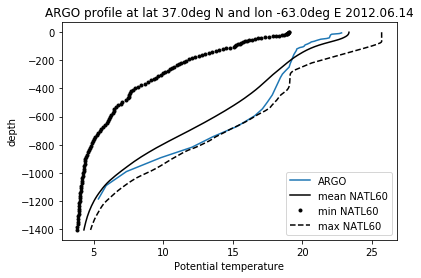

In [101]:
plot_temp_profile_all(t14natl[0],mean_temp37N63W,min_temp37N63W,max_temp37N63W,dep_nat)

In [98]:
def select_profiles_sal(latr,lonr):
    latval=lat_nat.values
    lonval=lon_nat.values
    mean_prof_sal=np.zeros(len(dep_nat.values))
    min_prof_sal=np.zeros(len(dep_nat.values))
    max_prof_sal=np.zeros(len(dep_nat.values))
    for z in np.arange(len(dep_nat.values)):
        salval=sal_nat[0,z].values
        sallat=salval[np.where(np.abs(latval-latr)<1)]
        lonlat=lonval[np.where(np.abs(latval-latr)<1)]
        salz=sallat[np.where(np.abs(lonlat-lonr)<1)]
        mean_prof_sal[z]=np.mean(salz)
        min_prof_sal[z]=np.min(salz)
        max_prof_sal[z]=np.max(salz)
    return mean_prof_sal, min_prof_sal, max_prof_sal
mean_sal37N63W,min_sal37N63W,max_sal37N63W=select_profiles_sal(37,-63)


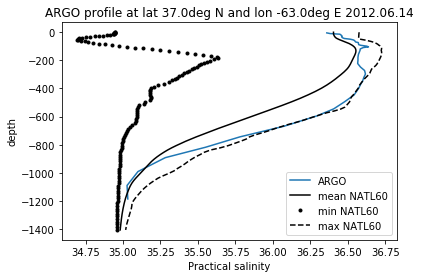

In [99]:
def plot_sal_profile_all(nprof,meant,mint,maxt,depmod):
    plt.plot(sal_ar[nprof,:],-1*dep_ar[nprof,:])
    plt.xlabel('Practical salinity')
    plt.ylabel('depth')
    plt.plot(meant,-1*depmod,'k-')
    plt.plot(mint,-1*depmod,'k.')
    plt.plot(maxt,-1*depmod,'k--')
    plt.legend(['ARGO','mean NATL60','min NATL60','max NATL60'])
    ts = pd.to_datetime(str(day_ar.values[nprof])) 
    d = ts.strftime('%Y.%m.%d')
    title="ARGO profile at lat "+str(np.trunc(lat_ar.values[nprof]))+"deg N and lon "+str(np.trunc(lon_ar.values[nprof]))+"deg E "+str(d)
    plt.title(title)
plot_sal_profile_all(t14natl[0],mean_sal37N63W,min_sal37N63W,max_sal37N63W,dep_nat)    